#### Sequential 모델

In [71]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [72]:
model = keras.Sequential(name = "my_example_model")
model.add(layers.Dense(64, activation='relu', name = "my_first_layer"))
model.add(layers.Dense(10, activation = 'softmax', name = "my_last_layer"))


In [73]:
model.weights

[]

In [74]:
model.build(input_shape = (None, 3))
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=my_example_model/my_first_layer/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=my_example_model/my_first_layer/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=my_example_model/my_last_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=my_example_model/my_last_layer/bias>]

In [75]:
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model = keras.Sequential()
model.add(keras.Input(shape = (3,)))
model.add(layers.Dense(64, activation = 'relu'))

In [77]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

### 함수형 API

* 다중입력, 다중 출력

In [78]:
inputs = keras.Input(shape = (3,), name = "my_input")
features = layers.Dense(64, activation= "relu")(inputs)
outputs = layers.Dense(10, activation = "softmax")(features)
model = keras.Model(inputs = inputs, outputs = outputs)


In [79]:
print(inputs.shape, inputs.dtype)   #심볼릭 텐서. 실제 데이터는 없지만 사용할 때 모델이 보게 될 데이터의 사양이 인코딩되어 있음

(None, 3) float32


In [80]:
print(features.shape, features.dtype)

(None, 64) float32


In [81]:
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
## 다중 입력, 다중 출력 모델

vocabulary_size = 10000
num_tags = 100
num_departments = 4   #목표: 이슈 티겟의 우선순위 점수로 0과 1 사이의 스칼라 출력을 하고 적절한 부서로 전달

title = keras.Input(shape = (vocabulary_size, ), name = "title")
text_body = keras.Input(shape = (vocabulary_size, ), name = "text_body")
tags = keras.Input(shape = (num_tags, ), name = "tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation="sigmoid", name = "priority")(features)
department = layers.Dense(num_departments, activation = "softmax", name = "department")(features)

model = keras.Model(inputs= [title, text_body, tags], outputs = [priority, department])

In [83]:
import numpy as np
num_samples= 1280

title_data = np.random.randint(0,2,size = (num_samples, vocabulary_size))
text_body_data = np.random.randint(0,2, size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0,2, size = (num_samples, num_tags))

priority_data =np.random.random(size = (num_samples, 1))
department_Data = np.random.randint(0,2,size = (num_samples, num_departments))

model.compile(optimizer="rmsprop", 
              loss = ['mean_squared_error', 'categorical_crossentropy'], 
              metrics = [['mean_absolute_error'], ['accuracy']])

model.fit([title_data, text_body_data, tags_data], [priority_data, department_Data], epochs = 1)
model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_Data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2758 - loss: 41.6011 - priority_mean_absolute_error: 0.4540
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.1398 - loss: 19.7771 - priority_mean_absolute_error: 0.4888
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


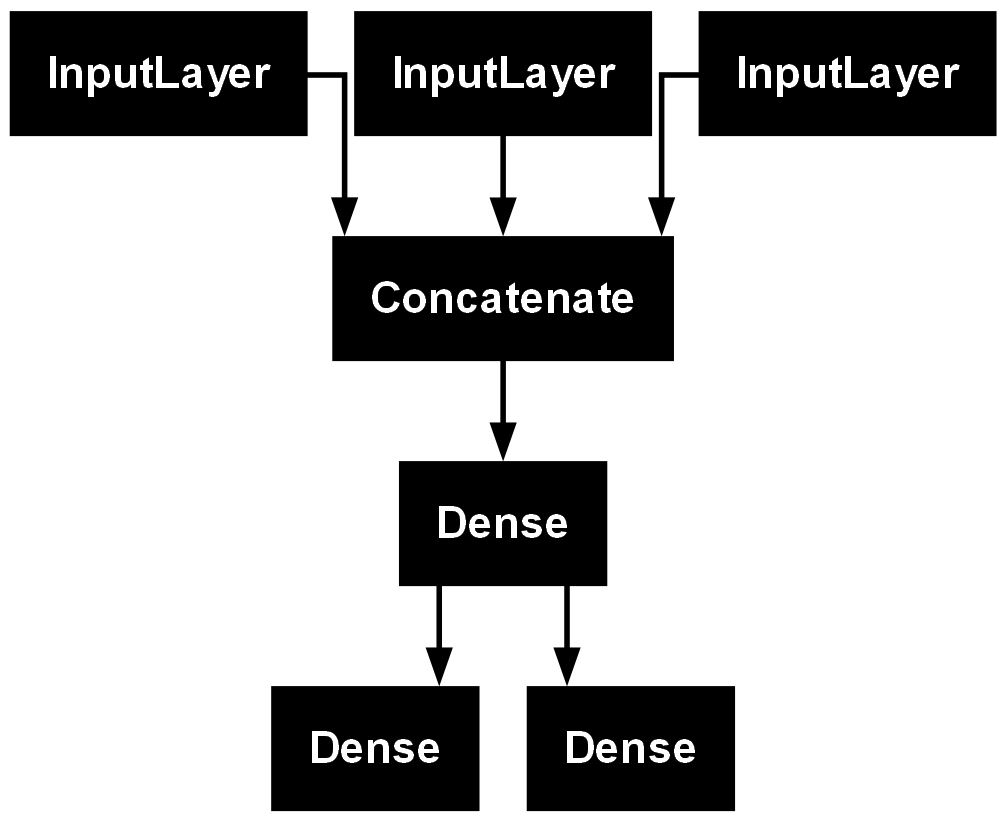

In [84]:
#모델의 연결 구조 (토폴로지)

keras.utils.plot_model(model, "ticker_classifier.png")

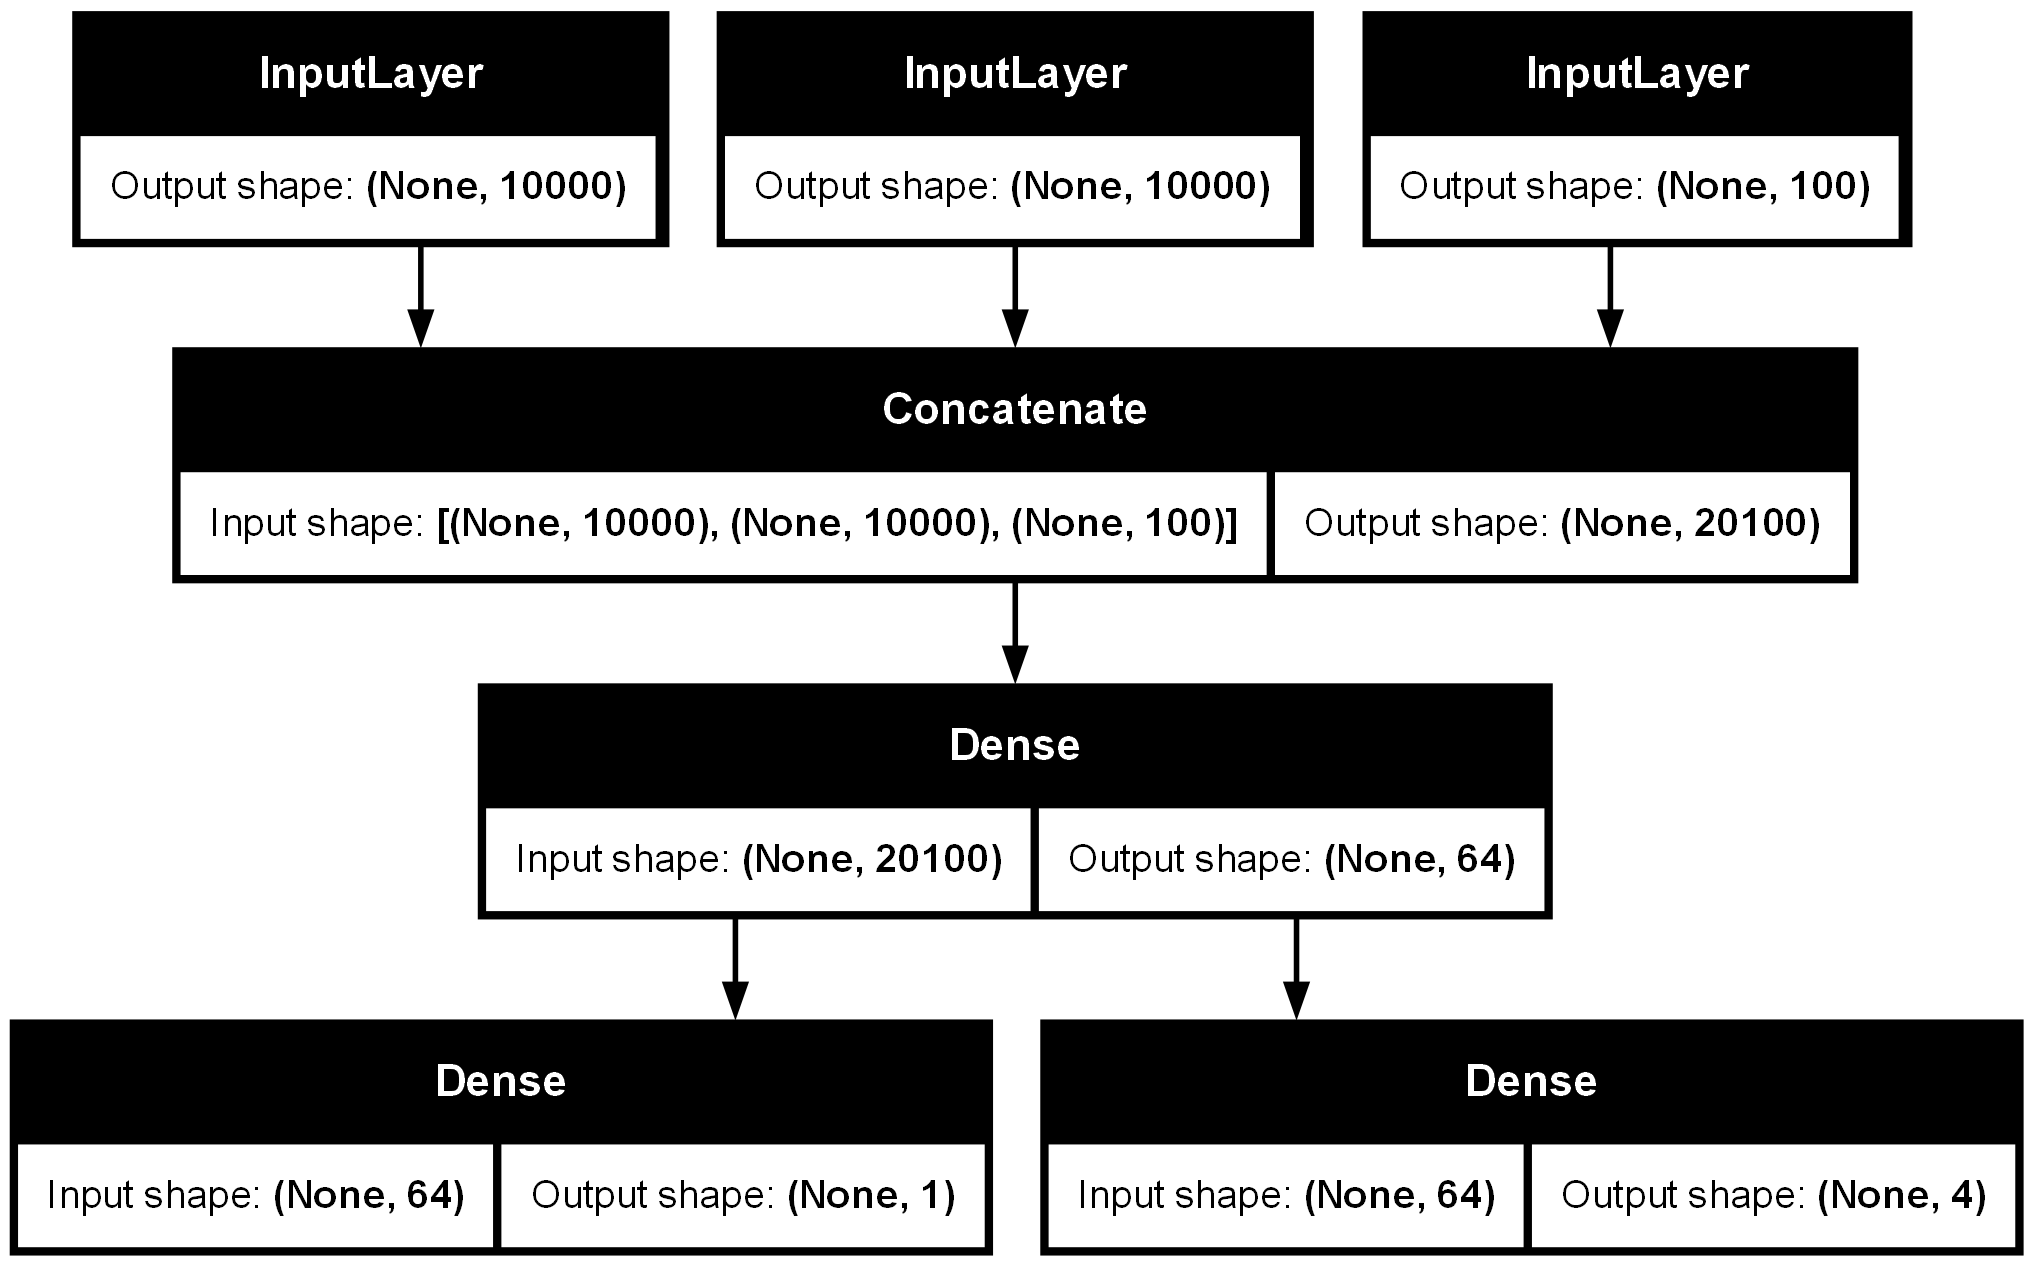

In [85]:
keras.utils.plot_model(
    model, "ticker_classifier_with_shape_info.png", show_shapes = "True"
)

In [86]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_3, built=True>,
 <Dense name=dense_40, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [87]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_94>

In [88]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [89]:
## 중간층의 출력을 재사용해서 새로운 모델 만들기

features = model.layers[4].output
difficulty = layers.Dense(3, activation = "softmax", name = "difficulty")(features)
new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty]
)

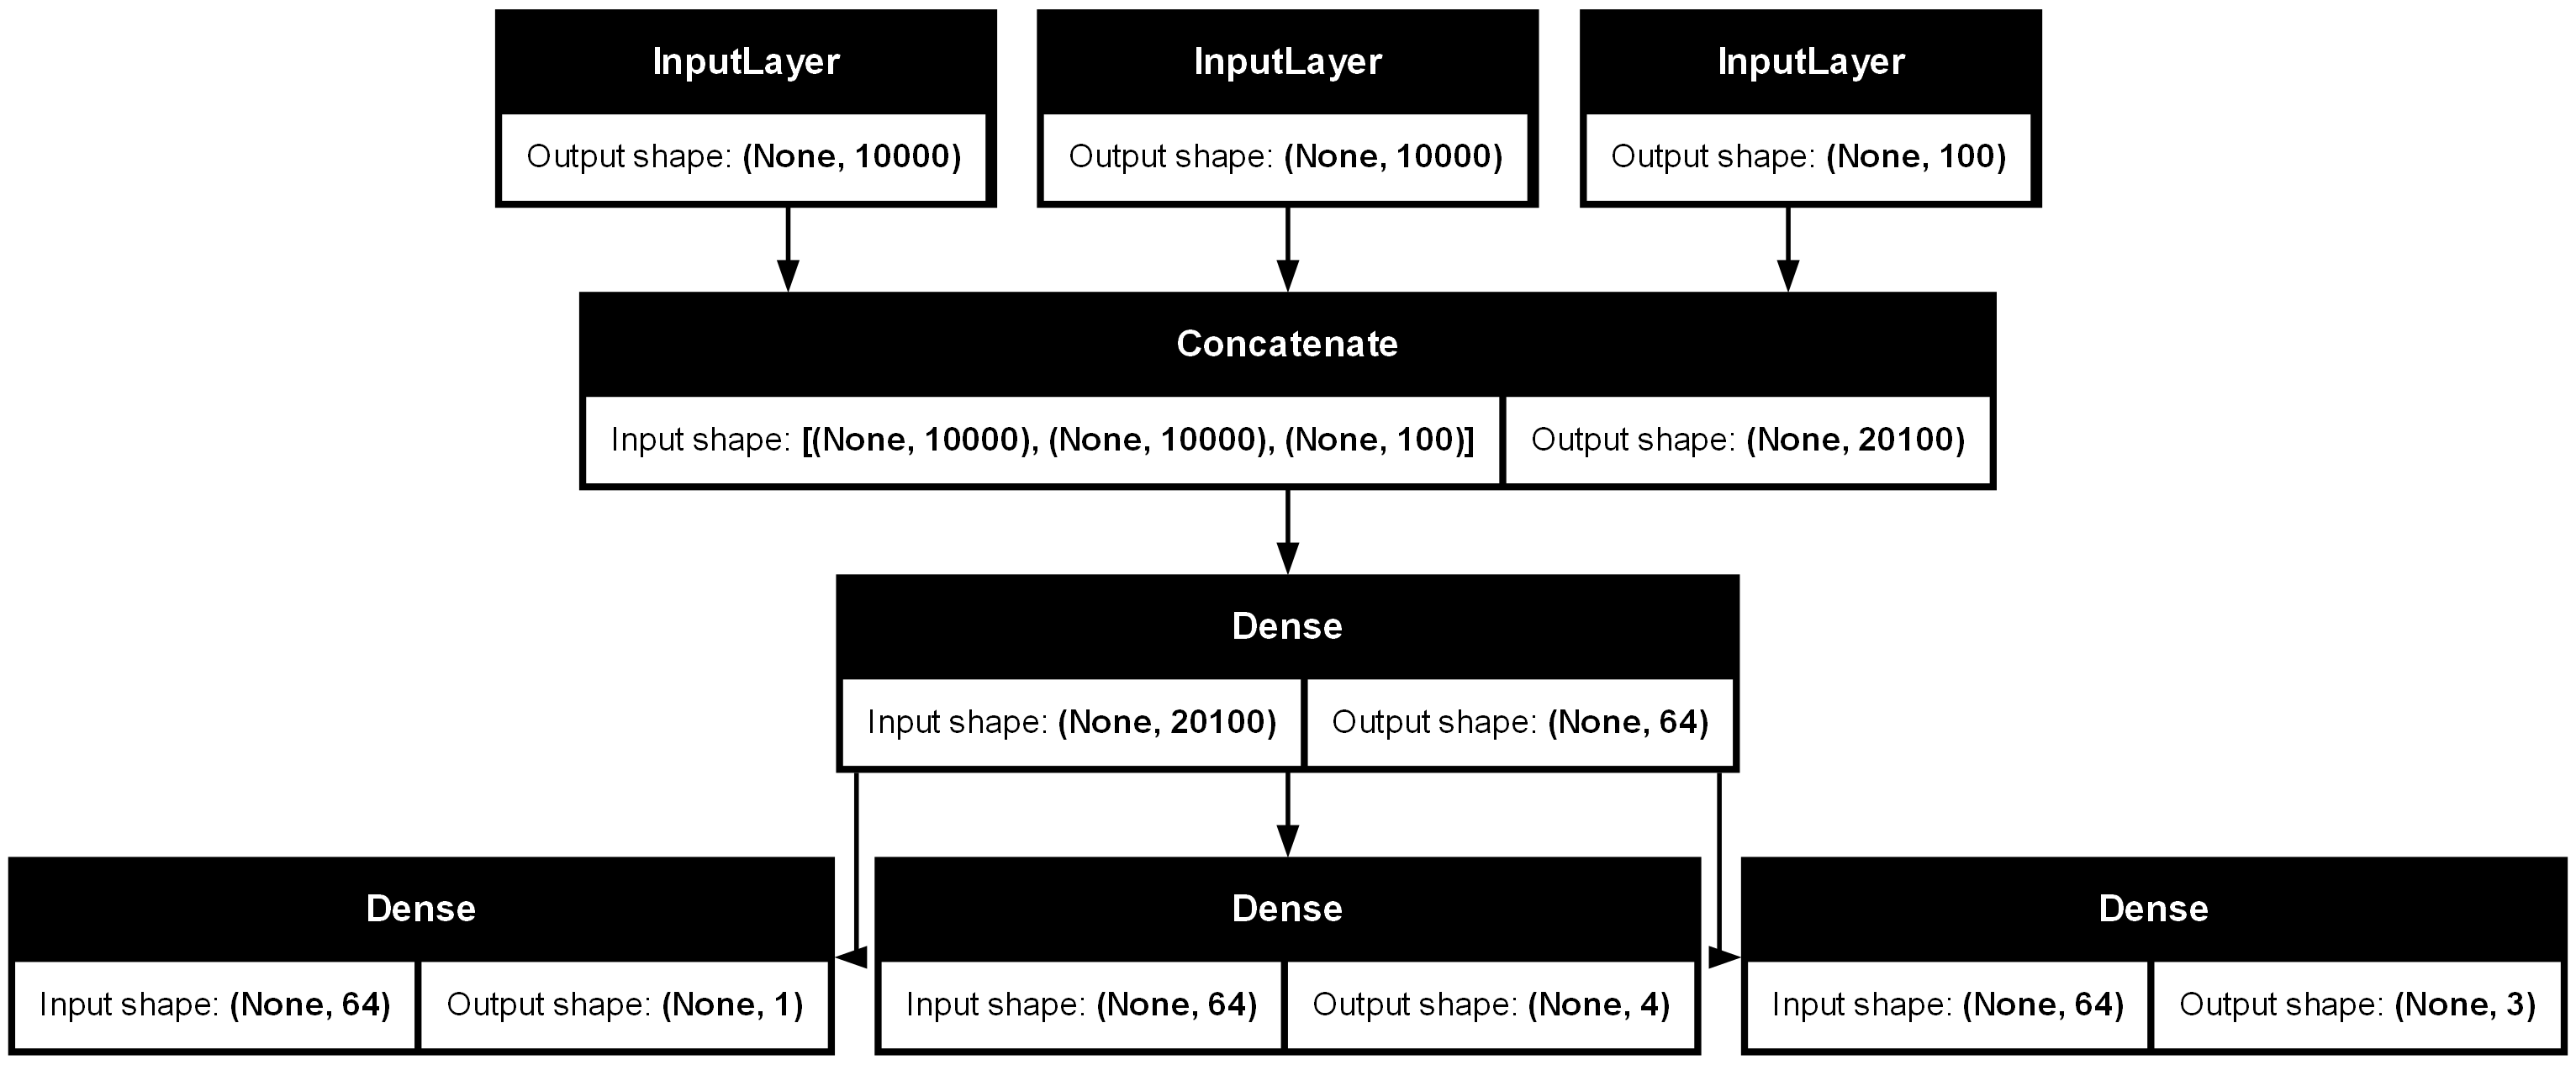

In [90]:
keras.utils.plot_model(
    new_model, "updated_ticket_classifier.png", show_shapes = True
)

#### **모델 서브클래싱**

In [91]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()  #부모 클래스 생성자
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_score = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(
            num_departments, activation = "softmax"
        )
        
    def call(self, inputs): #정방향 패스 정하기
        title = inputs["title"]
        text_body = inputs['text_body']
        tags = inputs['tags']
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_score(features)
        department = self.department_classifier(features)
        return priority, department

In [92]:
model = CustomerTicketModel(num_departments=4)
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [93]:
model.compile(optimizer="rmsprop", loss= ['mean_squared_error', 'categorical_crossentropy'], metrics = [['mean_squared_error'],['accuracy']])
#손실과 측정 지표로 전달하는 값은 call() 매서드가 반환하는 priority, department 와 일치해야 함. 

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_Data], epochs =1)
#입력데이터의 구조는 call() 매서드가 반환하는 것과 일치해야 함. title, text_body, tags
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_Data])
priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

 1/40 ━━━━━━━━━━━━━━━━━━━━ 18s 479ms/step - accuracy: 0.2500 - loss: 3.2539 - mean_squared_error: 0.1622

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2353 - loss: 31.1753 - mean_squared_error: 0.3274
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1418 - loss: 17.1756 - mean_squared_error: 0.3398
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


#### **여러 방식을 혼합하여 사용하기**

In [94]:
class Classifier(keras.Model):
    def __init__(self, num_classes= 2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)
    def call(self, inputs):
        return self.dense(inputs)
    
inputs = keras.Input(shape = (3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes = 10)(features)

model = keras.Model(inputs = inputs, outputs = outputs)    

In [95]:
## 서브클래싱 층이나 모델의 일부로 함수 사용하기

inputs = keras.Input(shape = (64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes = 2):
        super().__init__()
        self.dense = layers.Dense(64, activation = 'relu')
        self.classifier = binary_classifier
        
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### **사용자 정의 지표 만들기**

In [96]:
import tensorflow as tf

class RootMeanSquareError(keras.metrics.Metric):  #keras.metric.Metric 클래스를 상속
    def __init__(self, name = "rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name = "mse_sum", initializer = "zeros")
        self.total_samples = self.add_weight(
            name = "total_sampels", initializer = "zeros", dtype = "int32")
        
    def update_state(self, y_true, y_pred, sample_weight = None):
        y_true = tf.one_hot(y_true, depth = tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)
        

In [97]:
from tensorflow.keras.datasets import mnist
def get_mnist_model():
    inputs = keras.Input(shape = (28*28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation = "softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype("float32") /255
test_images = test_images.reshape((10000, 28*28)).astype("float32") /255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000: ], labels[:10000]
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy', RootMeanSquareError()])

model.fit(train_images, train_labels, epochs=3, validation_data = (val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.4528 - rmse: 0.4409 - val_accuracy: 0.9573 - val_loss: 0.1478 - val_rmse: 0.2542
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9518 - loss: 0.1681 - rmse: 0.2726 - val_accuracy: 0.9687 - val_loss: 0.1104 - val_rmse: 0.2201
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9613 - loss: 0.1361 - rmse: 0.2437 - val_accuracy: 0.9712 - val_loss: 0.1073 - val_rmse: 0.2119
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9683 - loss: 0.1159 - rmse: 0.2248


### **콜백사용하기**

콜백은 모델의 상태와 성능에 대한 모든 정보에 접근하고, 훈련 중지, 모델 저장, 가중치 적재 또는 모델 상태 변경 등을 처리할 수 있다. 

- 모델 체크포인트 저장 (훈련 동안 어떤 지점에서 모델의 그 때 가중치 저장)
- 조기 종료 (검증 손실이 더이상 향상되지 않을 때)
- 훈련하는 동안 하이퍼파라미터 값을 동적으로 조정 (학습률)
- 훈련과 검증 지표를 로그에 기록
- 모델이 학습한 표현을 업데이트 될 때마다 시각화
  

In [98]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = "checkpoint_path.keras",  #모델 파일의 저장 경로
        monitor = "val_loss",
        save_best_only = True, #val_loss가 좋아지지 않으면 덮어쓰지 말자. 가장 좋은거만 저장하자.
    ),
]

model = get_mnist_model()
model.compile(optimizer="rmsprop", 
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=10, callbacks=callbacks_list, validation_data = (val_images, val_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8665 - loss: 0.4450 - val_accuracy: 0.9538 - val_loss: 0.1586
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9507 - loss: 0.1674 - val_accuracy: 0.9681 - val_loss: 0.1144
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9638 - loss: 0.1272 - val_accuracy: 0.9720 - val_loss: 0.0997
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9686 - loss: 0.1107 - val_accuracy: 0.9751 - val_loss: 0.0940
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9735 - loss: 0.0960 - val_accuracy: 0.9757 - val_loss: 0.0896
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9732 - loss: 0.0927 - val_accuracy: 0.9771 - val_loss: 0.0884
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9778 - loss: 0.0820 - val_accuracy: 0.9795 - val_loss: 0.0898
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0823 - 

In [99]:
model.save('checkpoint_path.keras')

In [100]:
model = keras.models.load_model('checkpoint_path.keras')

### 사용자 정의 콜백 만들기

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8631 - loss: 0.4492 - val_accuracy: 0.9589 - val_loss: 0.1420
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9515 - loss: 0.1634 - val_accuracy: 0.9670 - val_loss: 0.1171
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9605 - loss: 0.1316 - val_accuracy: 0.9720 - val_loss: 0.1030
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9693 - loss: 0.1065 - val_accuracy: 0.9728 - val_loss: 0.1026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9720 - loss: 0.0961 - val_accuracy: 0.9754 - val_loss: 0.0984
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.0929 - val_accuracy: 0.9762 - val_loss: 0.0965
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0872 - val_accuracy: 0.9751 - val_loss: 0.1080
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9793 - loss: 0.0772 - 

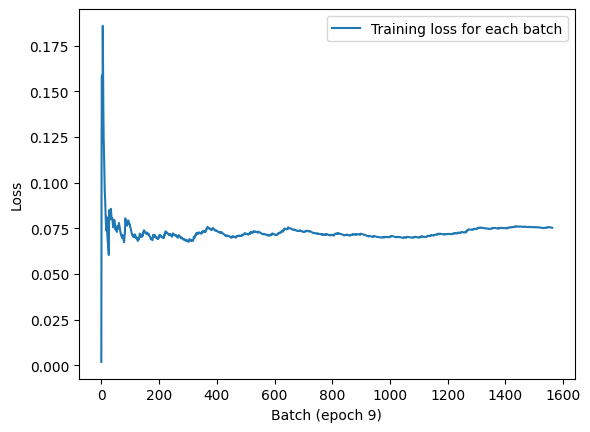

In [101]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label = "Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

model = get_mnist_model()
model.compile(optimizer='rmsprop', loss = "sparse_categorical_crossentropy", metrics= ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, callbacks= [LossHistory()], validation_data = (val_images, val_labels))

In [ ]:
### 사용자 정의 훈련, 평가 루프 만들기

def train_step(inputs, targets):
    with tf.GradientTale() as tape:
        predictions = model(inputs, training = True) #정방향 패스에서 케라스 모델 호출할 때는 trainng = True로 지정. 
        
        